# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Question 1

256


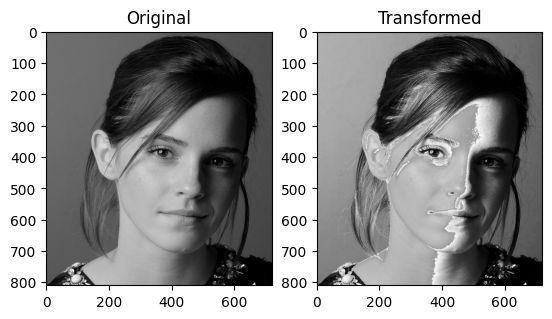

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Breakpoints from the graph (input, output)
c = np.array([(50, 50), (150, 255), (150, 150)])

# Create a lookup table (LUT) based on the breakpoints
# The LUT will map input pixel values to output pixel values
t1 = np.linspace(0, c[0,1], c[0,0] + 1, dtype=np.uint8)
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0], dtype=np.uint8)
t3 = np.linspace(c[2,1] + 1, 255, 255 - c[2,0], dtype=np.uint8)

# Concatenate segments to form the complete LUT
# Each segment corresponds to a range of input pixel values
transform = np.concatenate((t1, t2), axis=0)
transform = np.concatenate((transform, t3), axis=0).astype(np.uint8)
print(len(transform))  

# Load image (grayscale)
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply LUT
image_transformed = cv.LUT(img_orig, transform)

# Display results
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed')
plt.show()


#### Question 2

White Matter

(256,)


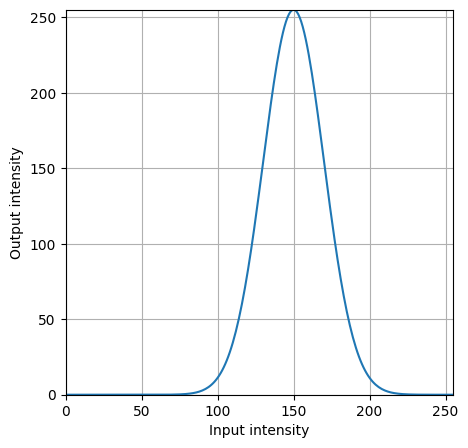

In [21]:
# Load image (grayscale)
image2 = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define the gaussian pulse
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t1 = np.clip(t, 0, 255)

print(t1.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

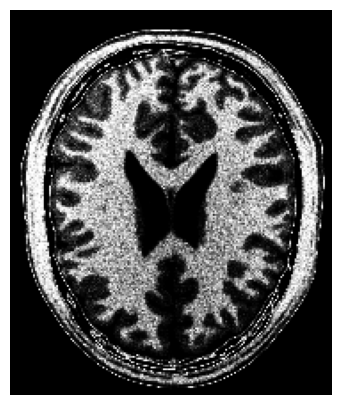

In [22]:
g = t1[image2]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Gray Matter

(256,)


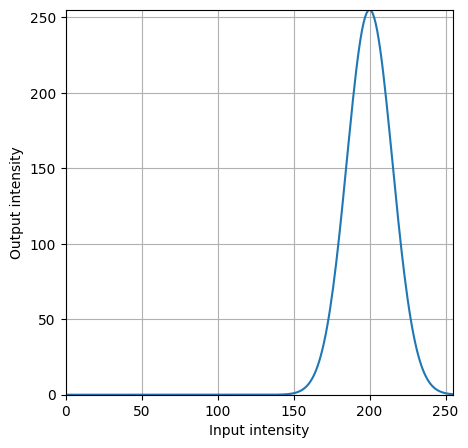

In [23]:
mu = 200
sigma = 15
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t2 = np.clip(t, 0, 255)

print(t2.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

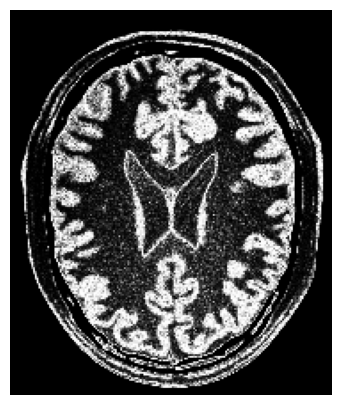

In [24]:
g = t2[image2]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### Question 3

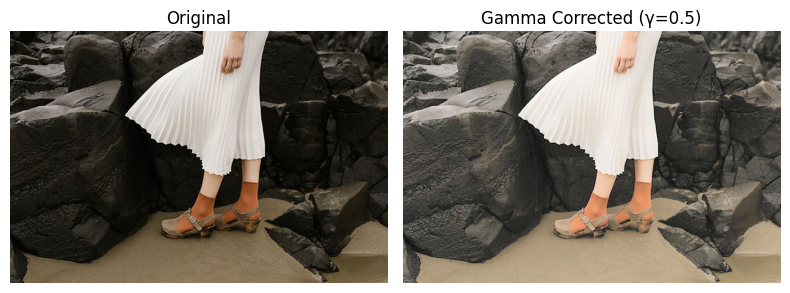

In [25]:
# Load the image in BGR color space
image3_bgr = cv.imread('Images/highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
image3_lab = cv.cvtColor(image3_bgr, cv.COLOR_BGR2LAB)

# Convert the image to RGB color space
image3_rgb = cv.cvtColor(image3_bgr, cv.COLOR_BGR2RGB)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Split the image in to L*a*b* color space
L,a,b = cv.split(image3_lab)

# Apply gamma correction to the L channel
gamma = 0.5
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
image3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)

# Plot the first image
axs[0].imshow(image3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(image3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

#### Question 4

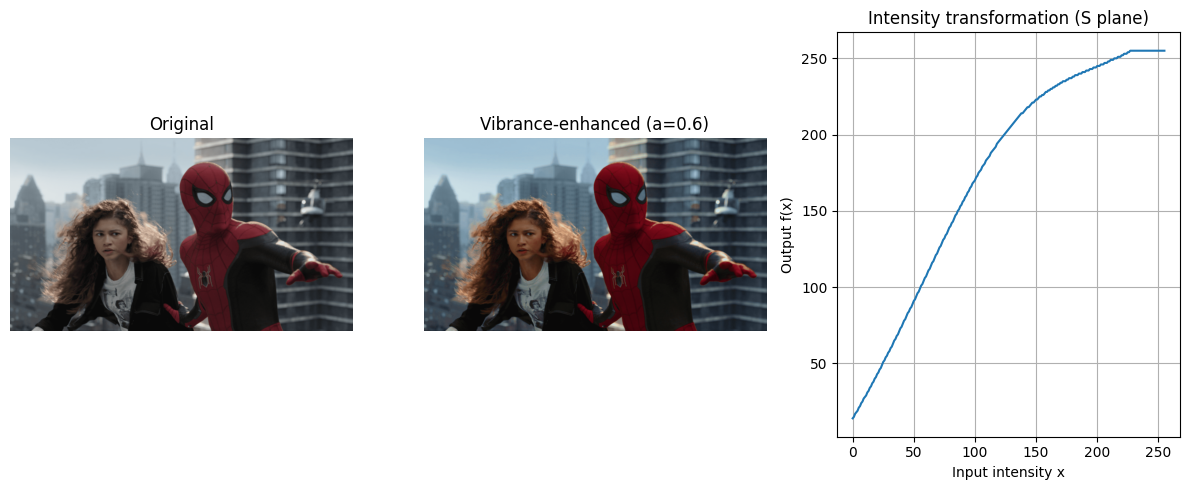

In [26]:
# Load image
image4_bgr = cv.imread('Images/spider.png')

# (a) Split into H, S, V planes 
image4_hsv = cv.cvtColor(image4_bgr, cv.COLOR_BGR2HSV)   
h, s, v = cv.split(image4_hsv)

# --- build LUT for the given transformation ---
# f(x) = min( x + a * 128 * exp(-(x-128)^2 / (2*sigma^2)), 255 )
a = 0.6
sigma = 70.0 
x = np.arange(0, 256)
f_x = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# (b) Apply the intensity transformation to the saturation plane using LUT
s_transformed = cv.LUT(s, f_x)

# (c) Set a to get a visually pleasing output
a = 0.6

# (d) Recombine H, transformed S, V
hsv_new = cv.merge([h, s_transformed, v])
image4_bgr_vibrant = cv.cvtColor(hsv_new, cv.COLOR_HSV2BGR)

# (e) Display results: original, enhanced, and the transform curve
plt.figure(figsize=(12,5))

# Display the original image
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(image4_bgr, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

# Display the vibrance-enhanced image
plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(image4_bgr_vibrant, cv.COLOR_BGR2RGB))
plt.title(f"Vibrance-enhanced (a={a})")
plt.axis("off")

# Display the intensity transformation curve
plt.subplot(1,3,3)
plt.plot(x, f_x)
plt.title("Intensity transformation (S plane)")
plt.xlabel("Input intensity x")
plt.ylabel("Output f(x)")
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



#### Question 5

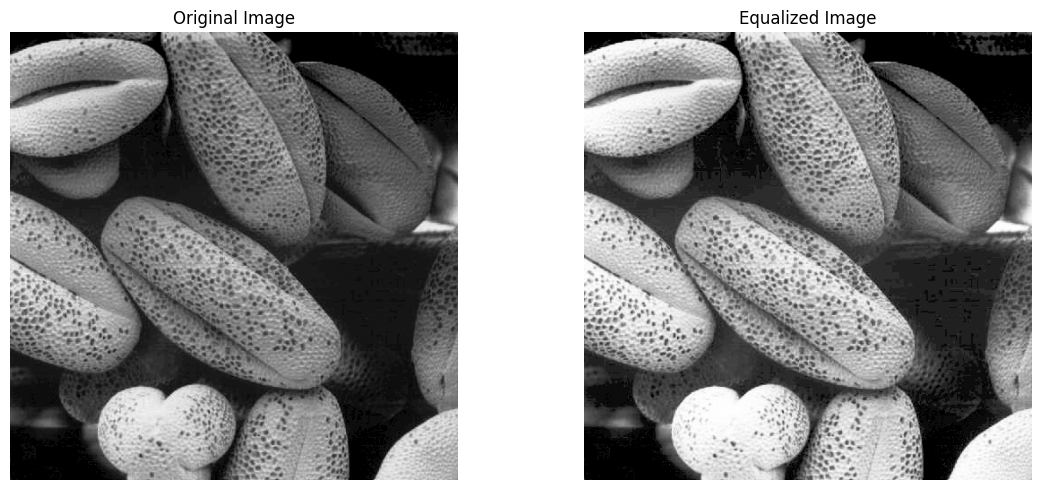

In [27]:
# Load image
image5 = cv.imread('Images/shells.tif', cv.IMREAD_GRAYSCALE)

def histogram_equalization(f):
    L = 256
    M, N = f.shape

    # Compute histogram (256 bins, pixel range 0-255)
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    hist = hist.flatten()

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF so that max = L-1
    cdf_normalized = (cdf - cdf.min()) * (L - 1) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Map original image pixels through the normalized CDF as transformation function
    equalized_img = cdf_normalized[f]

    return equalized_img, hist

eq_image, hist_before = histogram_equalization(image5)

# Histogram after equalization
hist_after = cv.calcHist([eq_image], [0], None, [256], [0, 256]).flatten()

# Plotting
plt.figure(figsize=(12,5))

# Display the original image
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image5, cmap='gray')
plt.axis('off')

# Display the equalized image
plt.subplot(1,2,2)
plt.title('Equalized Image')
plt.imshow(eq_image, cmap='gray')
plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Histograms before and after equalization

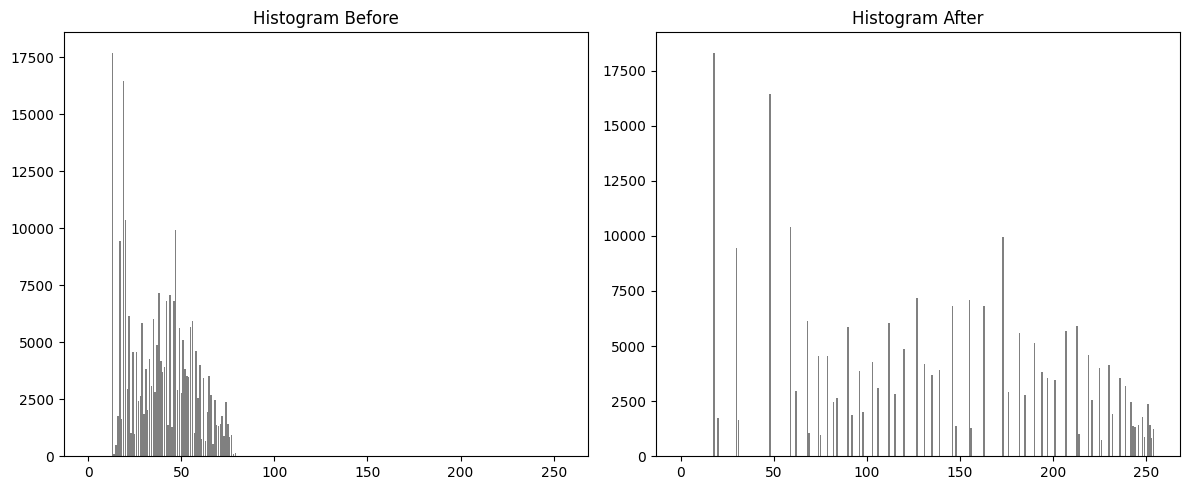

In [28]:
# Plotting
plt.figure(figsize=(12,5))

# Display the histogram before equalization
plt.subplot(1,2,1)
plt.title('Histogram Before')
plt.bar(range(256), hist_before, color='gray')

# Display the histogram after equalization
plt.subplot(1,2,2)
plt.title('Histogram After')
plt.bar(range(256), hist_after, color='gray')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()